In [1]:
import pandas as pd


## Содержание

- Какие типы данных обрабатывает pandas?
- Как читать и записывать табличные данные?
- Как выбрать подмножество DataFrame?
- Как создавать графики в Pandas?
- Как создать новые столбцы на основе существующих столбцов
- Как рассчитать сводную статистику
- Как изменить расположение таблиц
- Как объединить данные из нескольких таблиц
- Как легко обрабатывать данные временных рядов
- Как манипулировать текстовыми данными

## Какие типы данных обрабатывает pandas?



- Scalar - 1 элемент любого типа данных

- Series - 1D структура, похожая на одномерный неизменяемый массив с однородными данными.

- DataFrames - 2D двумерная табличная структура с изменяемым размером и неоднородно типизированными столбцами.

- Panel - 3D трехмерный массив с изменяемым размером.

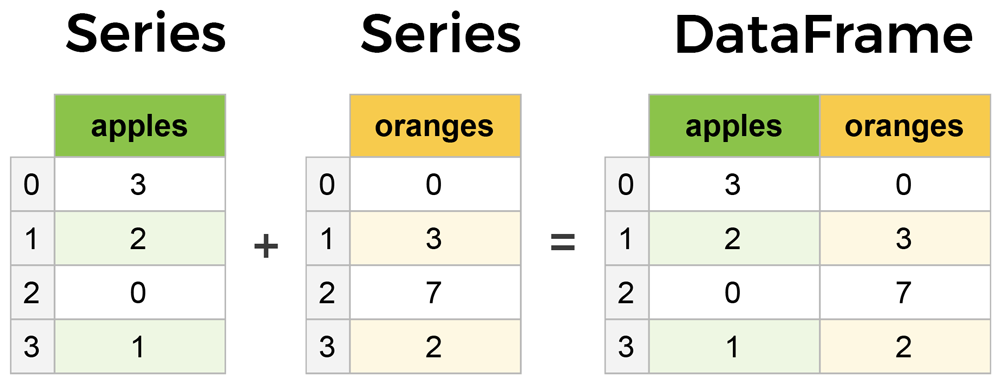

### Конструктор Series() 

In [17]:
seria1 = pd.Series([10, 15, 20], index=range(10, 35, 10))
seria1


10    10
20    15
30    20
dtype: int64

### max()

In [10]:
seria1.max()

20

### Series.index

In [13]:
seria1.index

RangeIndex(start=10, stop=35, step=10)

### Series.values

In [14]:
seria1.values

array([10, 15, 20])

### Доступ по индексу

In [19]:
seria1[30]

20

In [20]:
seria2 = pd.Series([1, 2, 3], index=['c', 'b', 'a'])
seria2['a']

3

In [22]:
seria2[1]

2

### Доступ по нескольким индексам

In [23]:
seria2[['c', 'b']]

c    1
b    2
dtype: int64

### Создание датафрейма с заданными индексами

In [30]:
people = {'Anna':20, 'Vadim':15, 'Den':11}

df3 = pd.DataFrame(people, index=[1,2,3])
df3

,Anna,Vadim,Den
1,20,15,11
2,20,15,11
3,20,15,11


### Создание серии с заданным именем

In [33]:
seria3 = pd.Series([1,2], name='None')
df4 = pd.DataFrame(seria3)
df4

,None
0,1
1,2


### Столбец датафрейма является серией

In [35]:
people_den = df3['Den']
type(people_den)

pandas.core.series.Series

In [36]:
df3[['Den', 'Anna']]

,Den,Anna
1,11,20
2,11,20
3,11,20


In [37]:
seria1

10    10
20    15
30    20
dtype: int64

In [39]:
seria1[20] = 555
seria1

10     10
20    555
30     20
dtype: int64

In [41]:
seria1[[10, 30]] = [111, 222]
seria1

10    111
20    555
30    222
dtype: int64

In [ ]:
seria1[[10, 20, 30]] = [1,2]
seria1

## Как читать и записывать табличные данные?

### Методы pd.read_* и .to_*

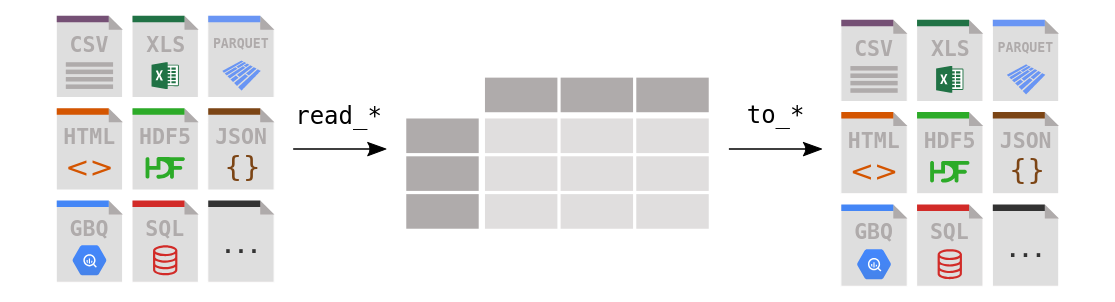

In [19]:
# df = pd.read_*

df = pd.read_csv('../data/titanic.csv')

# df.to_*

# df.to_excel('../data/titanic.xlsx', sheet_name="passengers", index=False)

### Работа с неоднородными данными

In [32]:
from numpy import NaN

In [37]:
data = {
    'a': {
        'aa': [
            {
                'aaa': [1, 2, 3, 's', NaN],
                'bbb': [11, 22, 33, 44, 'Итого:'],
                'ccc': [NaN, NaN, NaN, NaN, 22222222]
            },
        ]
    }
}

dictionary = data['a']['aa'][0]
dictionary

{'aaa': [1, 2, 3, 's', nan],
 'bbb': [11, 22, 33, 44, 'Итого:'],
 'ccc': [nan, nan, nan, nan, 22222222]}

In [38]:
df2 = pd.DataFrame(dictionary)
df2

,aaa,bbb,ccc
0,1,11,NaN
1,2,22,NaN
2,3,33,NaN
3,s,44,NaN
4,NaN,Итого:,22222222.0


In [39]:
df2.to_excel('../data/test.xlsx')

## Как выбрать подмножество DataFrame?

In [2]:
df = pd.read_csv('../data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
name_age = df[['Name', 'Age']]
type(name_age)

pandas.core.frame.DataFrame

In [4]:
names = df['Name']
type(names)

pandas.core.series.Series

### Определние размерности с помощью shape

In [45]:
name_age.shape

(891, 2)

In [48]:
names.shape

(891,)

In [54]:
name_age.T.shape

(2, 891)

In [55]:
name_age

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


### Выбор строк по условию

In [6]:
name_age['Age'] < 18

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [56]:
childs = name_age[name_age['Age'] < 18]
childs

,Name,Age
7,"Palsson, Master. Gosta Leonard",2.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
10,"Sandstrom, Miss. Marguerite Rut",4.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",14.0
16,"Rice, Master. Eugene",2.0
...,...,...
850,"Andersson, Master. Sigvard Harald Elias",4.0
852,"Boulos, Miss. Nourelain",9.0
853,"Lines, Miss. Mary Conover",16.0
869,"Johnson, Master. Harold Theodor",4.0


Доступные операторы сравнения:
- " < > "
- " >= <= " 
- " == != "

Доступные математические операторы над осями:
- " + - "
- " * / "

In [61]:
l = [True, True, False, False, True]

df2[l]

,aaa,bbb,ccc
0,1,11,NaN
1,2,22,NaN
4,NaN,Итого:,22222222.0


In [62]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Задание

Вывести строки в которых билет состоит из двух частей разделённых пробелом.

In [67]:
def func(value) -> bool: 
    
    return 

In [66]:
result = []
for value in df['Ticket'].values:
    pass

A/5 21171
PC 17599
STON/O2. 3101282
113803
373450
